In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series

# GroupBy on DataFrame

In [6]:
dframe = DataFrame({'J1':['X','C','U','X','C'],
                   'J2':['alp','be','alp','be','alp'],
                   'dataser1':np.random.randn(5),
                   'dataser2':np.random.randn(5)})
dframe

,J1,J2,dataser1,dataser2
0,X,alp,-1.973820,-0.098127
1,C,be,-0.118674,0.948998
2,U,alp,-0.972466,-0.248258
3,X,be,-2.025816,-1.087388
4,C,alp,1.512136,0.911743


In [7]:
group1 = dframe['dataser1'].groupby(dframe['J1'])

In [8]:
group1

In [9]:
group1.mean()

J1
C    0.696731
U   -0.972466
X   -1.999818
Name: dataser1, dtype: float64

In [10]:
cities = np.array(['NY','CR','CR','NY','NY'])

month = np.array(['Jan','Feb','Jan','Feb','Jan'])

In [11]:
dframe['dataser1'].groupby([cities,month]).mean()

CR  Feb   -0.118674
    Jan   -0.972466
NY  Feb   -2.025816
    Jan   -0.230842
Name: dataser1, dtype: float64

In [12]:
dframe

,J1,J2,dataser1,dataser2
0,X,alp,-1.973820,-0.098127
1,C,be,-0.118674,0.948998
2,U,alp,-0.972466,-0.248258
3,X,be,-2.025816,-1.087388
4,C,alp,1.512136,0.911743


In [13]:
dframe.groupby('J1').mean()

,dataser1,dataser2
J1,,
C,0.696731,0.930371
U,-0.972466,-0.248258
X,-1.999818,-0.592758


In [14]:
dframe.groupby(['J1','J2']).mean()

dataser1  dataser2
J1 J2                     
C  alp  1.512136  0.911743
   be  -0.118674  0.948998
U  alp -0.972466 -0.248258
X  alp -1.973820 -0.098127
   be  -2.025816 -1.087388

In [15]:
dframe.groupby(['J1']).size()

J1
C    2
U    1
X    2
dtype: int64

In [16]:
for name, group in dframe.groupby('J1'):
    print "This is the %s group" %name
    print group
    print '\n'

This is the C group
  J1   J2  dataser1  dataser2
1  C   be -0.118674  0.948998
4  C  alp  1.512136  0.911743


This is the U group
  J1   J2  dataser1  dataser2
2  U  alp -0.972466 -0.248258


This is the X group
  J1   J2  dataser1  dataser2
0  X  alp -1.973820 -0.098127
3  X   be -2.025816 -1.087388




In [17]:
for (J1,J2), group in dframe.groupby(['J1','J2']):
    print "Key1 = %s Key2 = %s" %(J1,J2)
    print group
    print '\n'

Key1 = C Key2 = alp
  J1   J2  dataser1  dataser2
4  C  alp  1.512136  0.911743


Key1 = C Key2 = be
  J1  J2  dataser1  dataser2
1  C  be -0.118674  0.948998


Key1 = U Key2 = alp
  J1   J2  dataser1  dataser2
2  U  alp -0.972466 -0.248258


Key1 = X Key2 = alp
  J1   J2  dataser1  dataser2
0  X  alp  -1.97382 -0.098127


Key1 = X Key2 = be
  J1  J2  dataser1  dataser2
3  X  be -2.025816 -1.087388




In [18]:
dframe

,J1,J2,dataser1,dataser2
0,X,alp,-1.973820,-0.098127
1,C,be,-0.118674,0.948998
2,U,alp,-0.972466,-0.248258
3,X,be,-2.025816,-1.087388
4,C,alp,1.512136,0.911743


In [19]:
group_dict = dict(list(dframe.groupby('J1')))

In [20]:
group_dict['X']

,J1,J2,dataser1,dataser2
0,X,alp,-1.973820,-0.098127
3,X,be,-2.025816,-1.087388


In [21]:
group_dict_axis1 = dict(list(dframe.groupby(dframe.dtypes,axis=1)))
group_dict_axis1

{dtype('float64'):    dataser1  dataser2
 0 -1.973820 -0.098127
 1 -0.118674  0.948998
 2 -0.972466 -0.248258
 3 -2.025816 -1.087388
 4  1.512136  0.911743, dtype('O'):   J1   J2
 0  X  alp
 1  C   be
 2  U  alp
 3  X   be
 4  C  alp}

In [22]:
dataset2_group = dframe.groupby(['J1','J2'])[['dataser2']]
dataset2_group.mean()

dataser2
J1 J2           
C  alp  0.911743
   be   0.948998
U  alp -0.248258
X  alp -0.098127
   be  -1.087388

# GroupBy on Dict and Series

In [23]:
animals = DataFrame(np.arange(25).reshape(5,5),
                   columns = ['W','X','L','Q','H'],
                   index = ['Dog','Bird','Cow','Rabbit','Crocodile'])
animals


,W,X,L,Q,H
Dog,0,1,2,3,4
Bird,5,6,7,8,9
Cow,10,11,12,13,14
Rabbit,15,16,17,18,19
Crocodile,20,21,22,23,24


In [24]:
animals.ix[1:3,['W','L']] = np.nan

C:\Users\DamianAleksanderMiko\Anaconda3\envs\testenv\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [25]:
animals

,W,X,L,Q,H
Dog,0.0,1,2.0,3,4
Bird,NaN,6,NaN,8,9
Cow,NaN,11,NaN,13,14
Rabbit,15.0,16,17.0,18,19
Crocodile,20.0,21,22.0,23,24


In [26]:
behavior_map = {'W':'good','X':'bad','L':'good','Q':'bad','H':'good'}

In [27]:
animal_col = animals.groupby(behavior_map,axis=1)

In [28]:
animal_col.sum()

,bad,good
Dog,4.0,6.0
Bird,14.0,9.0
Cow,24.0,14.0
Rabbit,34.0,51.0
Crocodile,44.0,66.0


Dodawanie W,L,H po X,Q

In [29]:
bahav_series = Series(behavior_map)
bahav_series

H    good
L    good
Q     bad
W    good
X     bad
dtype: object

In [30]:
animals.groupby(bahav_series,axis=1).count()

,bad,good
Dog,2,3
Bird,2,1
Cow,2,1
Rabbit,2,3
Crocodile,2,3


In [31]:
animals

,W,X,L,Q,H
Dog,0.0,1,2.0,3,4
Bird,NaN,6,NaN,8,9
Cow,NaN,11,NaN,13,14
Rabbit,15.0,16,17.0,18,19
Crocodile,20.0,21,22.0,23,24


In [32]:
animals.groupby(len).sum()

,W,X,L,Q,H
3,0.0,12,2.0,16,18
4,0.0,6,0.0,8,9
6,15.0,16,17.0,18,19
9,20.0,21,22.0,23,24


dodawanie równoliterowcyh zbiorów, tzn. W Dog, Cow = suma

In [35]:
keys = ['A','B','A','B','A']

In [36]:
animals.groupby([len,keys]).max()

,,W,X,L,Q,H
3,A,0.0,11,2.0,13,14
4,B,NaN,6,NaN,8,9
6,B,15.0,16,17.0,18,19
9,A,20.0,21,22.0,23,24


In [38]:
hier_col = pd.MultiIndex.from_arrays([['NY','NY','NY','SF','SF'],[1,2,3,1,2]],names=['City','sub_value'])

In [39]:
dframe_hr = DataFrame(np.arange(25).reshape(5,5),columns=hier_col)

In [40]:
dframe_hr = dframe_hr *100

In [41]:
dframe_hr

City         NY                SF      
sub_value     1     2     3     1     2
0             0   100   200   300   400
1           500   600   700   800   900
2          1000  1100  1200  1300  1400
3          1500  1600  1700  1800  1900
4          2000  2100  2200  2300  2400

# Aggregation

In [42]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'

In [44]:
dframe_wine = pd.read_csv('winequality-red.csv',sep=';')

In [45]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [46]:
dframe_wine['alcohol'].mean()

10.422983114446529

In [47]:
dframe_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [48]:
def max_to_min(arr):
    return arr.max() - arr.min()

In [49]:
wino = dframe_wine.groupby('quality')
wino.describe()

fixed acidity                                                     \
                count      mean       std  min   25%   50%     75%   max   
quality                                                                    
3                10.0  8.360000  1.770875  6.7  7.15  7.50   9.875  11.6   
4                53.0  7.779245  1.626624  4.6  6.80  7.50   8.400  12.5   
5               681.0  8.167254  1.563988  5.0  7.10  7.80   8.900  15.9   
6               638.0  8.347179  1.797849  4.7  7.00  7.90   9.400  14.3   
7               199.0  8.872362  1.992483  4.9  7.40  8.80  10.100  15.6   
8                18.0  8.566667  2.119656  5.0  7.25  8.25  10.225  12.6   

        volatile acidity            ... sulphates       alcohol             \
                   count      mean  ...       75%   max   count       mean   
quality                             ...                                      
3                   10.0  0.884500  ...     0.615  0.86    10.0   9.955000   
4                   53.0  0.693962  ...     0.600  2.00    53.0  10.265094   
5                  681.0  0.577041  ...     0.660  1.98   681.0   9.899706   
6                  638.0  0.497484  ...     0.750  1.95   638.0  10.629519   
7                  199.0  0.403920  ...     0.830  1.36   199.0  11.465913   
8                   18.0  0.423333  ...     0.820  1.10    18.0  12.094444   

                                                      
              std  min     25%     50%     75%   max  
quality                                               
3        0.818009  8.4   9.725   9.925  10.575  11.0  
4        0.934776  9.0   9.600  10.000  11.000  13.1  
5        0.736521  8.5   9.400   9.700  10.200  14.9  
6        1.049639  8.4   9.800  10.500  11.300  14.0  
7        0.961933  9.2  10.800  11.500  12.100  14.0  
8        1.224011  9.8  11.325  12.150  12.875  14.0  

[6 rows x 88 columns]

In [50]:
wino.describe()

fixed acidity                                                     \
                count      mean       std  min   25%   50%     75%   max   
quality                                                                    
3                10.0  8.360000  1.770875  6.7  7.15  7.50   9.875  11.6   
4                53.0  7.779245  1.626624  4.6  6.80  7.50   8.400  12.5   
5               681.0  8.167254  1.563988  5.0  7.10  7.80   8.900  15.9   
6               638.0  8.347179  1.797849  4.7  7.00  7.90   9.400  14.3   
7               199.0  8.872362  1.992483  4.9  7.40  8.80  10.100  15.6   
8                18.0  8.566667  2.119656  5.0  7.25  8.25  10.225  12.6   

        volatile acidity            ... sulphates       alcohol             \
                   count      mean  ...       75%   max   count       mean   
quality                             ...                                      
3                   10.0  0.884500  ...     0.615  0.86    10.0   9.955000   
4                   53.0  0.693962  ...     0.600  2.00    53.0  10.265094   
5                  681.0  0.577041  ...     0.660  1.98   681.0   9.899706   
6                  638.0  0.497484  ...     0.750  1.95   638.0  10.629519   
7                  199.0  0.403920  ...     0.830  1.36   199.0  11.465913   
8                   18.0  0.423333  ...     0.820  1.10    18.0  12.094444   

                                                      
              std  min     25%     50%     75%   max  
quality                                               
3        0.818009  8.4   9.725   9.925  10.575  11.0  
4        0.934776  9.0   9.600  10.000  11.000  13.1  
5        0.736521  8.5   9.400   9.700  10.200  14.9  
6        1.049639  8.4   9.800  10.500  11.300  14.0  
7        0.961933  9.2  10.800  11.500  12.100  14.0  
8        1.224011  9.8  11.325  12.150  12.875  14.0  

[6 rows x 88 columns]

In [51]:
wino.agg(max_to_min)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31.0,40.0,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38.0,112.0,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65.0,149.0,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71.0,159.0,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51.0,282.0,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39.0,76.0,0.00800,0.84,0.47,4.2


In [52]:
wino.agg('mean')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [53]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [54]:
dframe_wine['qual/alc ratio'] = dframe_wine['quality'] / dframe_wine['alcohol']

In [55]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.510204
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.510204
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.612245
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915


In [56]:
dframe_wine.pivot_table(index=['quality'])

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,qual/alc ratio,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,0.303286,2.635000,0.570000,24.900000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,0.392724,2.694340,0.596415,36.245283,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,0.507573,2.528855,0.620969,56.513950,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,0.569801,2.477194,0.675329,40.869906,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,0.614855,2.720603,0.741256,35.020101,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,0.668146,2.577778,0.767778,33.444444,0.423333


In [57]:
%mathplotlib inline

UsageError: Line magic function `%mathplotlib` not found.


In [58]:
dframe_wine.plot(kind='scatter',x='quality',y='alcohol')

In [59]:
%matplotlib inline

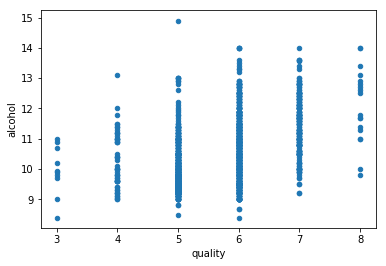

In [60]:
dframe_wine.plot(kind='scatter',x='quality',y='alcohol')

# Splitting Applying and Combining

In [61]:
dframe_wine = pd.read_csv('winequality-red.csv',sep=';')
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [62]:
def ranker(df):
    df['alc content rank'] = np.arange(len(df)) +1
    return df

In [63]:
dframe_wine.sort('alcohol',ascending=False,inplace=True)

AttributeError: 'DataFrame' object has no attribute 'sort'

In [64]:
dframe_wine.sort_index('alcohol',ascending=False,inplace=True)

ValueError: No axis named alcohol for object type <type 'type'>

In [65]:
dframe_wine.sort_index('alcohol')

ValueError: No axis named alcohol for object type <type 'type'>

In [66]:
dframe_wine.sort('alcohol')

AttributeError: 'DataFrame' object has no attribute 'sort'

In [67]:
dframe_wine.sort_values('alcohol',ascending=False,inplace=True)

works :D

In [68]:
dframe_wine = dframe_wine.groupby('quality').apply(ranker)

In [70]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alc content rank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,1
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,2
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6,3


In [71]:
num_of_qual = dframe_wine['quality'].values_counts()

AttributeError: 'Series' object has no attribute 'values_counts'

In [72]:
num_of_qual = dframe_wine['quality'].values()

TypeError: 'numpy.ndarray' object is not callable

In [73]:
num_of_qual = dframe_wine['quality'].value_counts()

In [75]:
num_of_qual

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [79]:
dframe_wine[dframe_wine.alc content rank == 1].head(len(num_of_qual))

SyntaxError: invalid syntax (<ipython-input-79-02641196a20c>, line 1)

In [87]:
def ranker(df):
    df['alc_content_rank'] = np.arange(len(df)) +1
    return df

In [88]:
dframe_wine.sort_values('alcohol',ascending=False,inplace=True)

In [89]:
dframe_wine = dframe_wine.groupby('quality').apply(ranker)

In [90]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alc content rank,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,1,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,1,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,1,1
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,2,2
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6,3,3


In [91]:
num_of_qual = dframe_wine['quality'].value_counts()

In [92]:
num_of_qual

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [93]:
dframe_wine[dframe_wine.alc_content_rank == 1].head(len(num_of_qual))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alc content rank,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,1,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,1,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,1,1
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7,1,1
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,1,1
899,8.3,1.02,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,1,1


# Cross Tabulation

In [94]:
from StringIO import StringIO

In [95]:
data="""\
SAMPLE ANIMAL INTELLIGENCE
1 DOG SMART
2 DOG SMART
3 CAT DUMB
4 CAT DUMB
5 DOG DUMB
6 CAT SMART"""

In [96]:
dframe = pd.read_table(StringIO(data),sep='\s+')

C:\Users\DamianAleksanderMiko\Anaconda3\envs\testenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [97]:
dframe

,SAMPLE,ANIMAL,INTELLIGENCE
0,1,DOG,SMART
1,2,DOG,SMART
2,3,CAT,DUMB
3,4,CAT,DUMB
4,5,DOG,DUMB
5,6,CAT,SMART


In [98]:
pd.crosstab(dframe.ANIMAL,dframe.INTELLIGENCE,margins=True)

INTELLIGENCE,DUMB,SMART,All
ANIMAL,,,
CAT,2,1,3
DOG,1,2,3
All,3,3,6
